<a href="https://colab.research.google.com/github/duongnhatthang/AA-deform/blob/main/csc588_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3

In [61]:
import numpy as np
import matplotlib.pyplot as plt


## 1.

In [68]:
w_opt = np.ones((2,1))*2**(-0.5)
def generate_data(n, gamma, num_repeat=1000):
    '''
    n: sample size
    gamma: margin parameter
    '''
    # sample n^2 sample before discard
    tmp = np.random.uniform(low=-1, high=1, size=(n**2,2))
    out = np.zeros((n,3))
    cnt = 0
    for i in range(num_repeat):
        cnt=0
        for item in tmp:
            if item[0]**2+item[1]**2<=1 and np.abs(w_opt.T@item)>=gamma:
                out[cnt,:2] = item
                cnt+=1
            if cnt == n:
                break
        if cnt==n:
            break
    out[:,2] = np.squeeze(np.sign(out[:,:2]@w_opt))
    return out

In [123]:
data = generate_data(n=1000, gamma=1/320000)

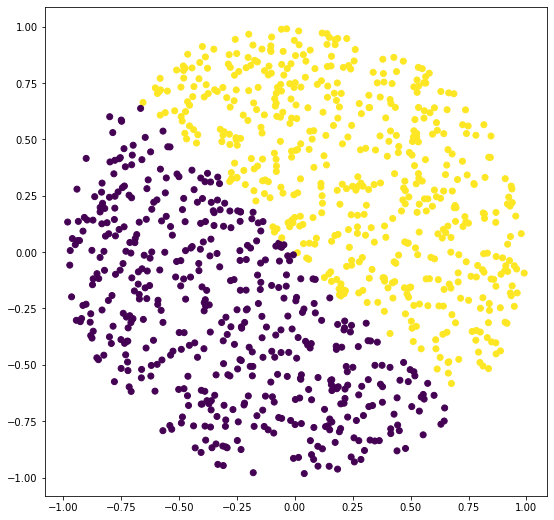

In [124]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()

##2.

In [210]:
def sim_perceptron(data, gamma, is_plot=True):
    n = data.shape[0]
    M_max = int(np.ceil(1/gamma**2))
    w_cache = np.zeros((M_max+1, 2))
    M=0
    for i, d in enumerate(data):
        X = d[:2]
        y = d[2]
        w = np.expand_dims(w_cache[M], axis=-1)
        y_pred = np.sign(w.T@X)
        if y_pred != y:
            w_cache[M+1]=w_cache[M] + y*X
            M+=1
    w_cache = w_cache[:M+1]

    # Plotting
    if is_plot:
        plt.rcParams['figure.figsize'] = (18, 18)
        X = np.array(range(M+1))

        plt.subplot(221)
        plt.title("<w^{(m)}, w*> as a function of m")
        plt.xlabel("m")
        plt.plot(X, w_cache[:,:2]@w_opt, label ="<w^{(m)}, w*>")
        plt.plot(X, gamma*X, label ="gamma*m")
        plt.legend()

        plt.subplot(222)
        plt.title("||w^{(m)}||_2 as a function of m")
        plt.xlabel("m")
        plt.plot(X, np.sqrt(w_cache[:,0]**2 + w_cache[:,1]**2), label ="||w^{(m)}||_2")
        plt.plot(X, np.sqrt(X), label ="sqrt{m}")
        plt.legend()
        plt.show()

    return M, w_cache

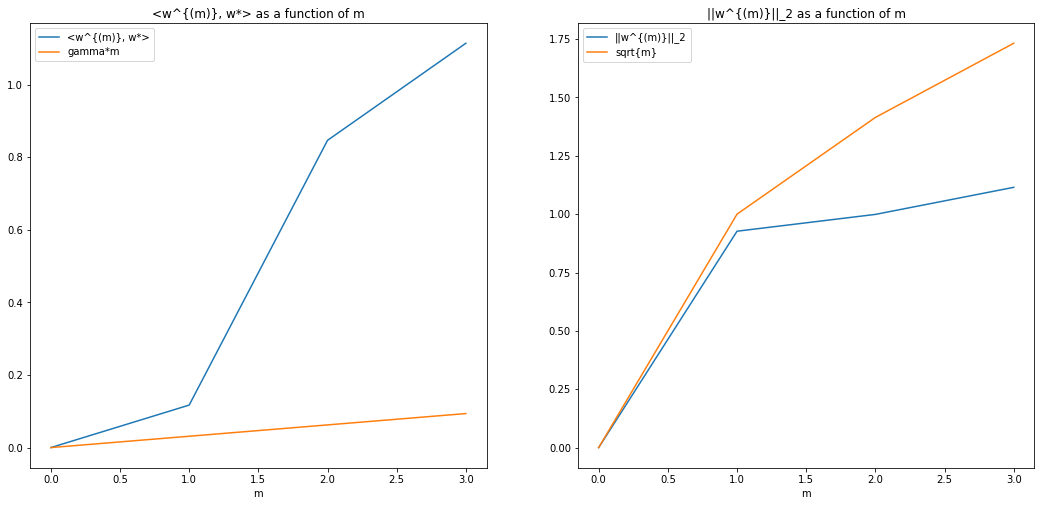

Total number of mistake M = 3. The final w = [0.76309075 0.81278988]


In [211]:
n=1000
gamma=1/32
data = generate_data(n, gamma)
M, w_cache = sim_perceptron(data, gamma)
print(f"Total number of mistake M = {M}. The final w = {w_cache[-1]}")

### Sanity check

In [212]:
y_pred = np.squeeze(np.sign(data[:,:2]@np.expand_dims(w_cache[-1], axis=-1)))
y = data[:,2]
print(f"The number of prediction mistakes are: {np.sum(y_pred-y)}")

The number of prediction mistakes are: 0.0


##3.

In [233]:
gamma_list = 1/np.power(2, np.array(range(6))+1)
gamma_list.sort()

In [234]:
n_repeat = 10
M_cache = np.zeros((gamma_list.shape[0], n_repeat))
for i, gamma in enumerate(gamma_list):
    for j in range(n_repeat):
        data = generate_data(100, gamma)
        M_cache[i, j], _ = sim_perceptron(data, gamma, is_plot=False)

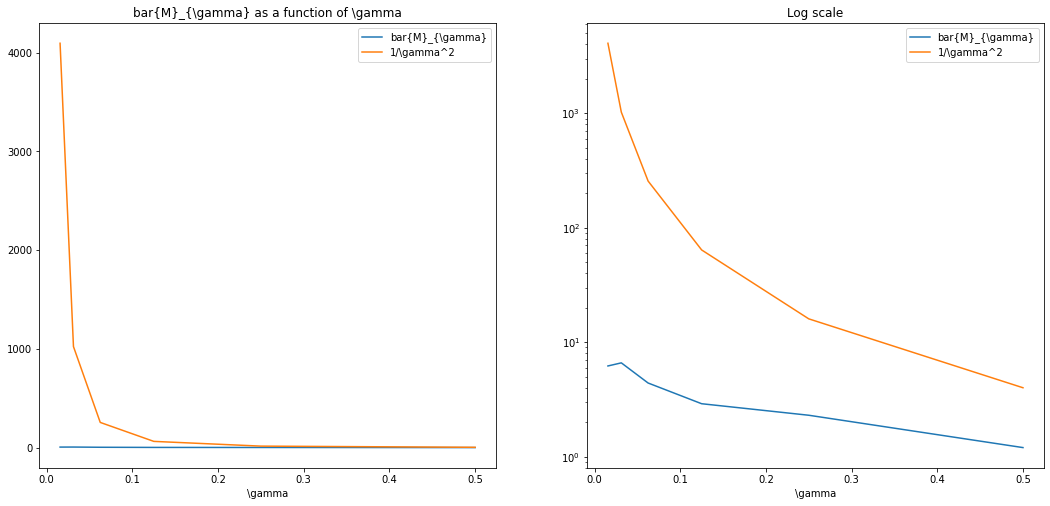

In [237]:
M_avg = np.average(M_cache, axis=1)
plt.rcParams['figure.figsize'] = (18, 18)
X = gamma_list

plt.subplot(221)
plt.title("bar{M}_{\gamma} as a function of \gamma")
plt.xlabel("\gamma")
plt.plot(X, M_avg, label ="bar{M}_{\gamma}")
plt.plot(X, np.power(X,-2), label ="1/\gamma^2")
plt.legend()

plt.subplot(222)
plt.title("Log scale")
plt.xlabel("\gamma")
plt.plot(X, M_avg, label ="bar{M}_{\gamma}")
plt.plot(X, np.power(X,-2), label ="1/\gamma^2")
plt.legend()
plt.yscale('log')
plt.show()

### From the plot, we can see that the total number of mistake is smaller than its upper-bound.